In [ ]:
!pip install -U -q kaggle
!mkdir -p ~/.kaggle

In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"suyashchougule","key":"f8131a9b2edfa78230e3eef39c3f2b69"}'}

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!kaggle datasets list

ref                                                         title                                                size  lastUpdated          downloadCount  
----------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  
allen-institute-for-ai/CORD-19-research-challenge           COVID-19 Open Research Dataset Challenge (CORD-19)    2GB  2020-05-02 20:35:01          64098  
divyansh22/us-border-crossing-data                          US Border Crossing Data                               2MB  2020-04-19 09:38:10           1659  
roche-data-science-coalition/uncover                        UNCOVER COVID-19 Challenge                          142MB  2020-04-29 22:47:23           7887  
baltacifatih/turkish-lira-banknote-dataset                  Turkish Lira Banknote Dataset                         3GB  2020-04-19 14:48:39            178  
doaaalsenani/usa-cers-dataset                               US C

In [ ]:
!kaggle datasets download -d ianmoone0617/flower-goggle-tpu-classification

 98% 260M/264M [00:03<00:00, 71.2MB/s]
100% 264M/264M [00:03<00:00, 69.7MB/s]


In [ ]:
from zipfile import ZipFile
file_name='/content/flower-goggle-tpu-classification.zip'
with ZipFile(file_name,'r') as zip:
  zip.extractall()
  print('done')

done


In [ ]:
# Ignore  the warnings
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

# data visualisation and manipulation
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
 
#configure
# sets matplotlib to inline and displays graphs below the corressponding cell.
%matplotlib inline  
style.use('fivethirtyeight')
sns.set(style='whitegrid',color_codes=True)

#model selection
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,precision_score,recall_score,confusion_matrix,roc_curve,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

#preprocess.
from keras.preprocessing.image import ImageDataGenerator

#dl libraraies
from tensorflow.python.keras import backend as K
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop
from keras.utils import to_categorical

# specifically for cnn
from tensorflow.python.keras.layers import Dropout, Flatten,Activation
from tensorflow.python.keras.layers import Conv2D, MaxPooling2D, BatchNormalization
 
import tensorflow as tf
import random as rn

# specifically for manipulating zipped images and getting numpy arrays of pixel values of images.
import cv2                  
import numpy as np  
from tqdm import tqdm
import os                   
from random import shuffle  
from zipfile import ZipFile
from PIL import Image

In [ ]:
import pandas as pd
flowers_idx=pd.read_csv('/content/flowers_idx.csv')
flowers_idx.head(5)


,id,flower_cls
0,7486,cape flower
1,9454,cape flower
2,6974,cape flower
3,4739,cape flower
4,8783,cape flower


In [ ]:
flowers_label=pd.read_csv('/content/flowers_label.csv')
flowers_label.head(10)

,label,flower_class
0,0,pink primrose
1,1,hard-leaved pocket orchid
2,2,canterbury bells
3,3,sweet pea
4,4,wild geranium
5,5,tiger lily
6,6,moon orchid
7,7,bird of paradise
8,8,monkshood
9,9,globe thistle


In [ ]:
# X=[]
# Z=[]
# IMG_SIZE=150
FLOWER_DIR='/content/flower_tpu/flower_tpu/flowers_google/flowers_google'

# def assign_label(img,flower_type):
#     return flower_type




In [ ]:
# img='/content/flower_tpu/flower_tpu/flowers_google/flowers_google/0.jpeg'
# cv2.imread(img).shape


In [ ]:
# def make_train_data(flower_type,DIR):
#     for img in tqdm(os.listdir(DIR)):
#         label=assign_label(img,flower_type)
#         path = os.path.join(DIR,img)
#         img = cv2.imread(path,cv2.IMREAD_COLOR)
#         img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
#         X.append(np.array(img))
#         Z.append(str(label))
        

In [ ]:

img_array=[]
label_array=[]
for i in range(flowers_idx.shape[0]):
  
  save=str(i)+'.jpeg'
  path = os.path.join(FLOWER_DIR, save)
  
  _label=flowers_idx[flowers_idx['id']==i]['flower_cls']
  img = cv2.imread(path,cv2.IMREAD_COLOR)
  img=cv2.resize(img,(125,125))
  # print(path)
  # make_train_data(_label[1],path)
  img_array.append(np.array(img))
  label_array.append(list(_label)[0])
        

In [ ]:
print(label_array[2])

king protea


In [ ]:
label_array

In [ ]:
for i in range(16465):
  p=list(flowers_label[flowers_label['flower_class']==label_array[i]]['label'])
  # print(i)
  label_array[i]=p[0]


TypeError: ignored

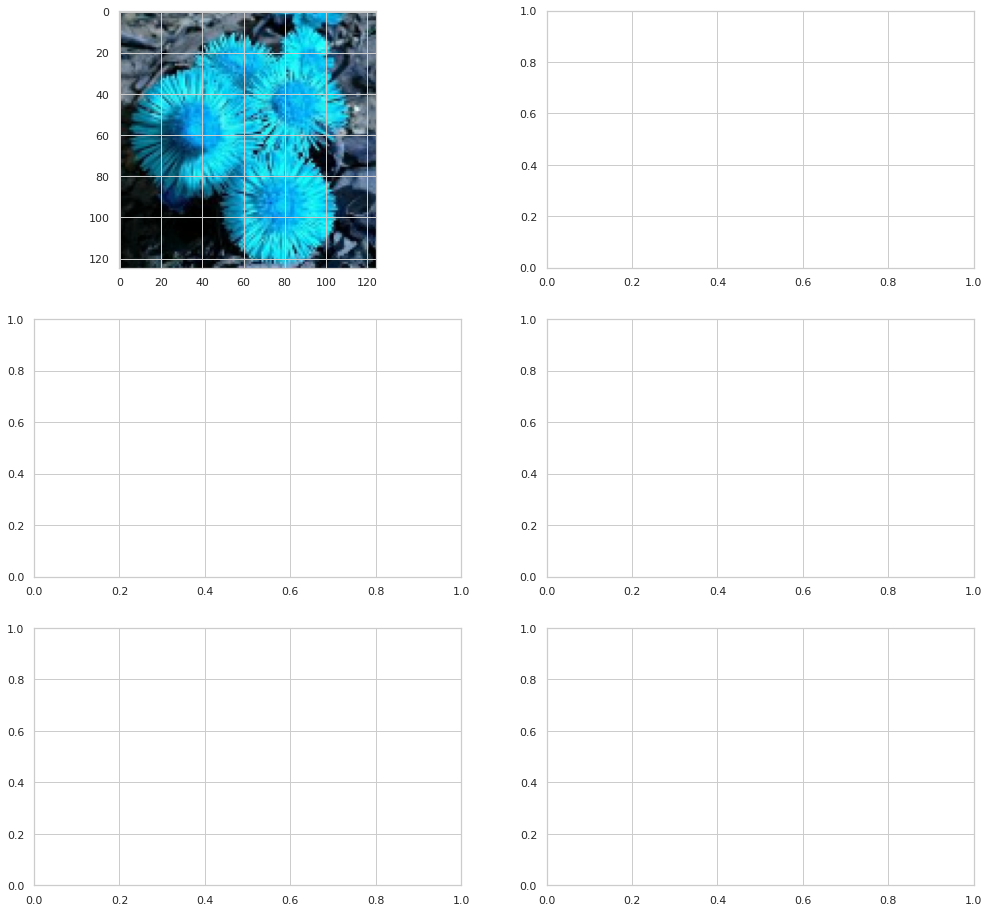

In [ ]:
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(label_array))
        ax[i,j].imshow(img_array[l])
        ax[i,j].set_title('Flower: '+label_array[l])
        
plt.tight_layout()

In [ ]:
# "len(label_array)

In [ ]:
# label_array

In [ ]:

Y_train=to_categorical(label_array)


In [ ]:
X_train=np.array(img_array)
X_train=X_train/255

In [ ]:
print(X_train.shape)
print(Y_train.shape)

(16465, 125, 125, 3)
(16465, 104)


In [ ]:
x_train,x_val,y_train,y_val=train_test_split(X_train,Y_train,test_size=0.1,random_state=42)

In [ ]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)
# tf.set_random_seed(42)

In [ ]:
input_shape=(125,125,3)

In [ ]:
model = Sequential()
model.add(Conv2D(filters = 32, kernel_size = (5,5),padding = 'Same',activation ='relu', input_shape = input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))


model.add(Conv2D(filters = 64, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
 

model.add(Conv2D(filters =96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Conv2D(filters = 96, kernel_size = (3,3),padding = 'Same',activation ='relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Flatten())
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))


model.add(Dense(128,activation='relu'))
model.add(Dropout(0.3))

model.add(Dense(104, activation = "softmax"))
model.summary()


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 125, 125, 32)      2432      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 62, 62, 64)        18496     
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 31, 31, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 31, 31, 96)        55392     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 15, 15, 96)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 15, 15, 96)       

In [ ]:
import keras

In [ ]:
# import tensorflow as tf 
# model = tf.keras.models.load_model('/content/flower_final.h5')

In [ ]:
# import keras
# model=keras.models.load_model('/content/flower_final.h5')

In [ ]:
# import tensorflow as tf 
# classifierLoad = tf.keras.models.load_model('/content/flower_final.h5')

In [ ]:
# import io
# from tensorflow.python.keras.models import load_model

# model=load_model(io.BytesIO(model['flower_final.h5']))

In [ ]:
model=classifierLoad

In [ ]:
batch_size=128
epochs=100

from keras.callbacks import ReduceLROnPlateau
red_lr= ReduceLROnPlateau(monitor='val_acc',patience=3,verbose=1,factor=0.1)

In [ ]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=True,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.001),loss='categorical_crossentropy',metrics=['accuracy'])

**total 150 epochs were taken. first 50 and model were saved and loaded agian followed by another 100 epochs**

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (x_val,y_val),
                              verbose = 1, steps_per_epoch=x_train.shape[0] // batch_size)
# model.fit(x_train,y_train,epochs=epochs,batch_size=batch_size,validation_data = (x_val,y_val))
# from keras.models import load_model
# model.save('/content/flower100.h5')
# print("complete")

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/100
115/115 [==============================] - 279s 2s/step - loss: 1.4092 - accuracy: 0.5993 - val_loss: 1.5073 - val_accuracy: 0.6126
Epoch 2/100
115/115 [==============================] - 276s 2s/step - loss: 1.3868 - accuracy: 0.6125 - val_loss: 1.5216 - val_accuracy: 0.6321
Epoch 3/100
115/115 [==============================] - 280s 2s/step - loss: 1.3820 - accuracy: 0.6125 - val_loss: 1.4802 - val_accuracy: 0.6248
Epoch 4/100
115/115 [==============================] - 281s 2s/step - loss: 1.3723 - accuracy: 0.6110 - val_loss: 1.4752 - val_accuracy: 0.6272
Epoch 5/100
115/115 [==============================] - 281s 2s/step - loss: 1.3363 - accuracy: 0.6178 - val_loss: 1.4651 - val_accuracy: 0.6339
Epoch 6/100
115/115 [==============================] - 281s 2s/step - loss: 1.3356 - accuracy: 0.6234 - val_loss: 1.4727 - val_accuracy: 0.6266
Epoch 7/100
115/115 [==============================] - 281s 

In [ ]:
from keras.models import load_model
model.save('/content/flower100.h5')
print("complete")

complete


In [ ]:

X_test=[]
test_data=[]

test_dir = "/content/flower_tpu/flower_tpu/test/test"

from os import walk

for (dirpath, dirnames, filenames) in walk(test_dir):
    test_data.extend(filenames)
    break
print(test_data[0])  

    

j=0

for i in test_data :

  
    
    
    path = os.path.join(test_dir, test_data[j]) 

  #   _label=flowers_idx[flowers_idx['id']==i]['flower_cls']
    img = cv2.imread(path,cv2.IMREAD_COLOR)
    # print(img)
    img=cv2.resize(img,(125,125))
    # print(path)
    # make_train_data(_label[1],path)
    X_test.append(np.array(img))
    j=j+1

#   label_array.append(list(_label)[0])
# print(X_test)
# print(X_test.shape)

X_t=np.array(X_test)
X_t=X_t/255
print(X_t.shape)

c21cd70d4.jpeg
(7382, 125, 125, 3)


In [ ]:
import tensorflow as tf 
classifierLoad1 = tf.keras.models.load_model('/content/flower100.h5')

model=classifierLoad1

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

pred=model.predict(X_t)
pred_digits=np.argmax(pred,axis=1)

In [ ]:
pred_digits.shape
pred_list=list(pred_digits)

**labels are given according to given label csv file**

In [ ]:
ndf=pd.DataFrame()

ndf.insert(loc=0, column='test data set',value=test_data)
ndf.insert(loc=1, column='labels',value=pred_list)


ndf.head



<bound method NDFrame.head of        test data set  labels
0     c21cd70d4.jpeg      52
1     352d983b1.jpeg       5
2     0a4ddf5c2.jpeg      72
3     c590e76b2.jpeg       8
4     60372c4bb.jpeg     103
...              ...     ...
7377  54419838d.jpeg      53
7378  d56f1eaf5.jpeg      38
7379  eaddf667a.jpeg       4
7380  dc4f97c9d.jpeg     103
7381  7e61b7ed2.jpeg      12

[7382 rows x 2 columns]>